# Taller 5 - Archivo de soporte

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Identificamos NAs en los datos

In [3]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(392, 8)

In [6]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [7]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [8]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)

In [9]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


In [ ]:
#sns.pairplot(train)

In [ ]:
#sns.heatmap(train.corr())

In [10]:
train_X = train.copy()
test_X = test.copy()

In [11]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

## Modelo Base

In [ ]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Base_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
Base_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
Base_h_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = Base_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.0816 - val_loss: 22.7961
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8972 - val_loss: 22.6339
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8754 - val_loss: 22.4709
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.2249 - val_loss: 22.3037
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2846 - val_loss: 22.1320
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.3465 - val_loss: 21.9593
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6417 - val_loss: 21.7826
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2482 - val_loss: 21.6010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5090 - val_loss: 21.4126
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3766 - val_loss: 21.2150
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1552 - val_loss: 21.0093
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

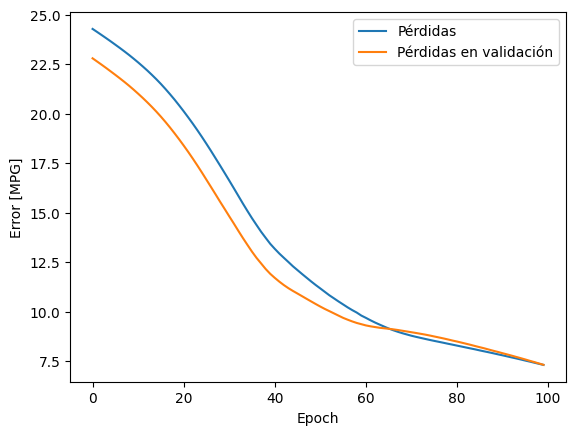

In [ ]:
plt.plot(history.history['loss'], label='Pérdidas')
plt.plot(history.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
x = tf.linspace(0.0, 250, 251).numpy()  
x = np.tile(x[:, np.newaxis], (1, 4))   

y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


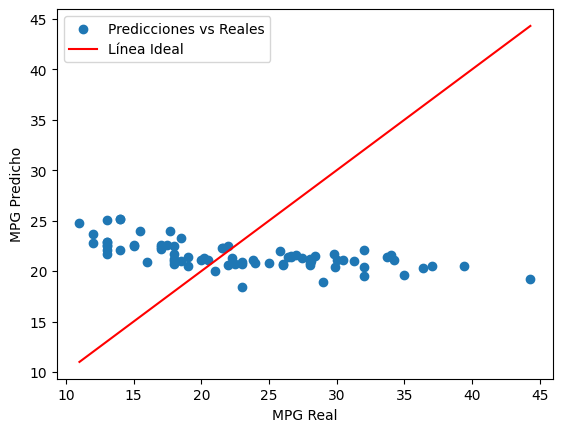

In [ ]:
y_pred = Base_h_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.legend()
plt.show()

In [ ]:
test_res = {}
test_res['Base_h_model'] = Base_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)

In [ ]:
test_res

{'Base_h_model': 7.077182769775391}

In [ ]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Base_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
Base_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
Base_h_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = Base_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.0816 - val_loss: 22.7961
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8972 - val_loss: 22.6339
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8754 - val_loss: 22.4709
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.2249 - val_loss: 22.3037
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2846 - val_loss: 22.1320
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.3465 - val_loss: 21.9593
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6417 - val_loss: 21.7826
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2482 - val_loss: 21.6010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5090 - val_loss: 21.4126
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3766 - val_loss: 21.2150
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1552 - val_loss: 21.0093
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

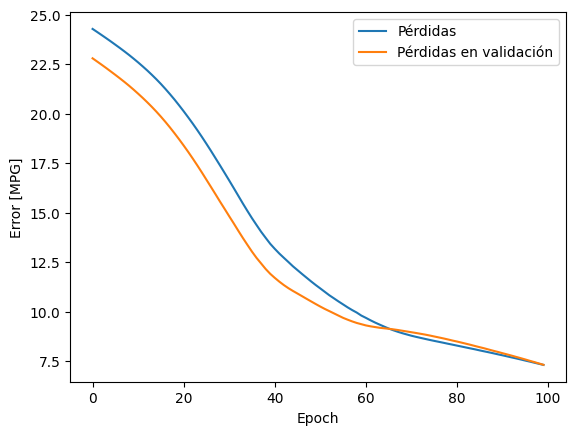

In [ ]:
plt.plot(history.history['loss'], label='Pérdidas')
plt.plot(history.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
x = tf.linspace(0.0, 250, 251).numpy()  
x = np.tile(x[:, np.newaxis], (1, 4))   

y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


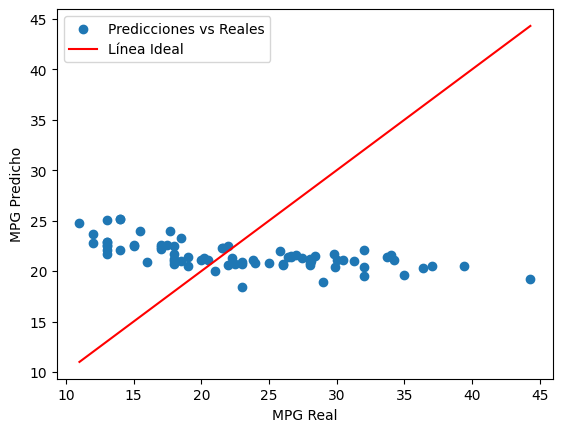

In [ ]:
y_pred = Base_h_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.legend()
plt.show()

In [ ]:
test_res = {}
test_res['Base_h_model'] = Base_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)

In [ ]:
test_res

{'Base_h_model': 7.077182769775391}

In [ ]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Base_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
Base_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
Base_h_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = Base_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.0816 - val_loss: 22.7961
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8972 - val_loss: 22.6339
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8754 - val_loss: 22.4709
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.2249 - val_loss: 22.3037
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2846 - val_loss: 22.1320
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.3465 - val_loss: 21.9593
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6417 - val_loss: 21.7826
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2482 - val_loss: 21.6010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5090 - val_loss: 21.4126
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3766 - val_loss: 21.2150
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1552 - val_loss: 21.0093
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

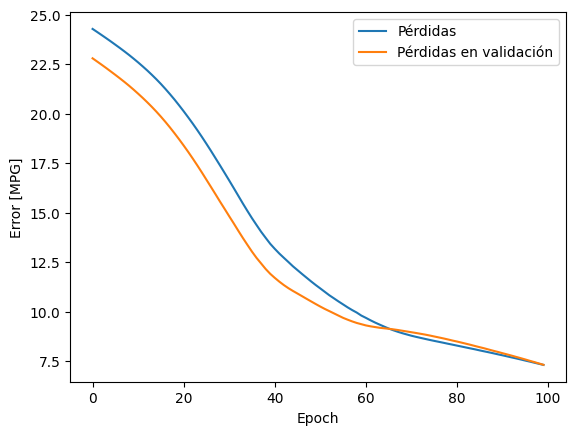

In [ ]:
plt.plot(history.history['loss'], label='Pérdidas')
plt.plot(history.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
x = tf.linspace(0.0, 250, 251).numpy()  
x = np.tile(x[:, np.newaxis], (1, 4))   

y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


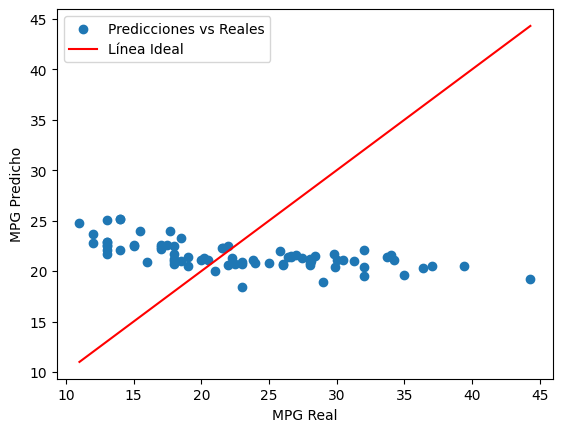

In [ ]:
y_pred = Base_h_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.legend()
plt.show()

In [ ]:
test_res = {}
test_res['Base_h_model'] = Base_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)

## Modelo Variando numero de neuronas (de la capa oculta)

In [23]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
NN_1_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NN_2_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NN_3_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(40, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [25]:
NN_1_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NN_2_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NN_3_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [26]:
history_NN1 = NN_1_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NN2 = NN_2_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NN3 = NN_3_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 22.9881 - val_loss: 21.6294
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.4530 - val_loss: 21.4569
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.6293 - val_loss: 21.2739
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.8208 - val_loss: 21.0794
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.7069 - val_loss: 20.8729
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.2304 - val_loss: 20.6548
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.3251 - val_loss: 20.4249
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.4792 - val_loss: 20.1829
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1093 - val_loss: 19.9286
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.4056 - val_loss: 19.6609
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.2431 - val_loss: 19.3799
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

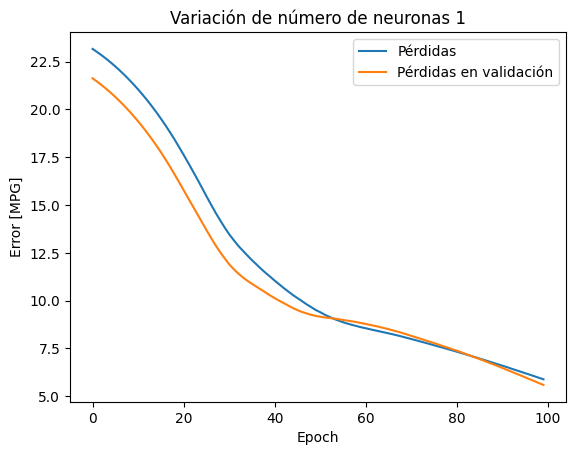

In [27]:
plt.plot(history_NN1.history['loss'], label='Pérdidas')
plt.plot(history_NN1.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 1')
plt.legend()

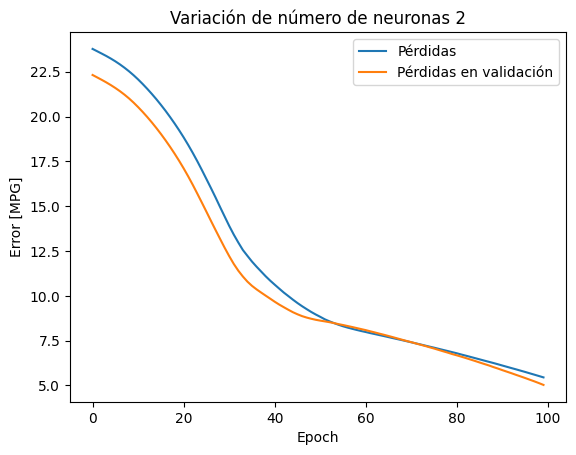

In [28]:
plt.plot(history_NN2.history['loss'], label='Pérdidas')
plt.plot(history_NN2.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 2')
plt.legend()

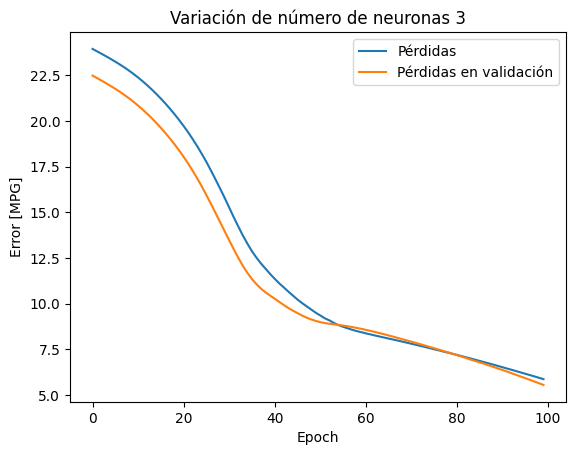

In [29]:
plt.plot(history_NN3.history['loss'], label='Pérdidas')
plt.plot(history_NN3.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 3')
plt.legend()

In [ ]:
# x = tf.linspace(0.0, 250, 251).numpy()  
# x = np.tile(x[:, np.newaxis], (1, 4))   

# y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


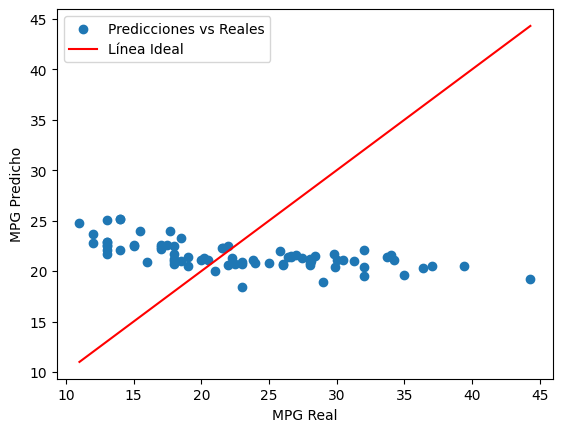

In [ ]:
# y_pred = Base_h_model.predict(test_X[Variables_exp])

# plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
# plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
# plt.xlabel("MPG Real")
# plt.ylabel("MPG Predicho")
# plt.legend()
# plt.show()

In [31]:
test_res_NN1 = {}
test_res_NN1['NN_1_h_model'] = NN_1_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN1

{'NN_1_h_model': 5.5144524574279785}

In [32]:
test_res_NN2 = {}
test_res_NN2['NN_2_h_model'] = NN_2_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN2

{'NN_2_h_model': 4.969393253326416}

In [33]:
test_res_NN3 = {}
test_res_NN3['NN_3_h_model'] = NN_3_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN3

{'NN_3_h_model': 5.456470012664795}

## Modelo Variando numero de capas

In [ ]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
NN_1_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NN_2_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NN_3_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(40, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
NN_1_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NN_2_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NN_3_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history_NN1 = NN_1_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NN2 = NN_2_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NN3 = NN_3_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 22.9881 - val_loss: 21.6294
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.4530 - val_loss: 21.4569
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.6293 - val_loss: 21.2739
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.8208 - val_loss: 21.0794
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.7069 - val_loss: 20.8729
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.2304 - val_loss: 20.6548
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.3251 - val_loss: 20.4249
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.4792 - val_loss: 20.1829
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1093 - val_loss: 19.9286
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.4056 - val_loss: 19.6609
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.2431 - val_loss: 19.3799
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

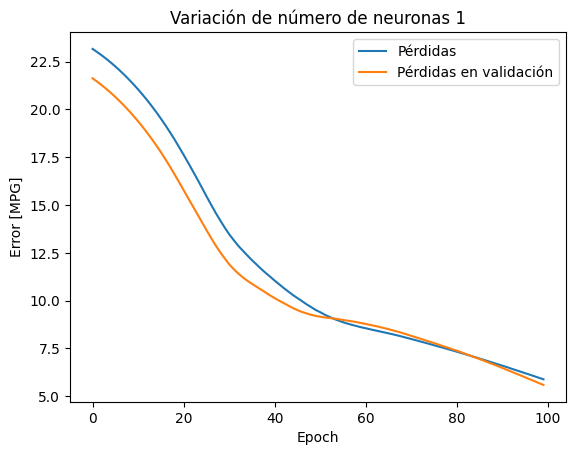

In [ ]:
plt.plot(history_NN1.history['loss'], label='Pérdidas')
plt.plot(history_NN1.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 1')
plt.legend()

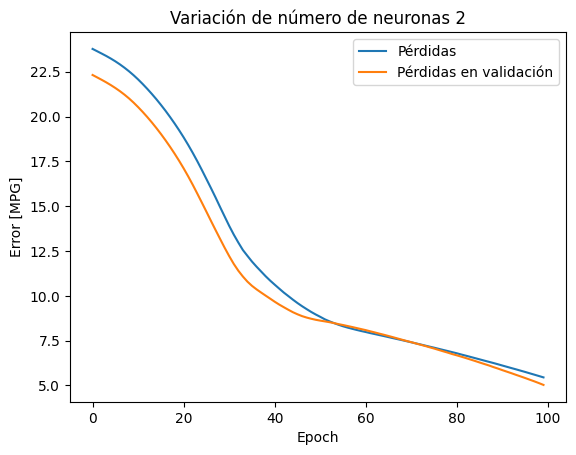

In [ ]:
plt.plot(history_NN2.history['loss'], label='Pérdidas')
plt.plot(history_NN2.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 2')
plt.legend()

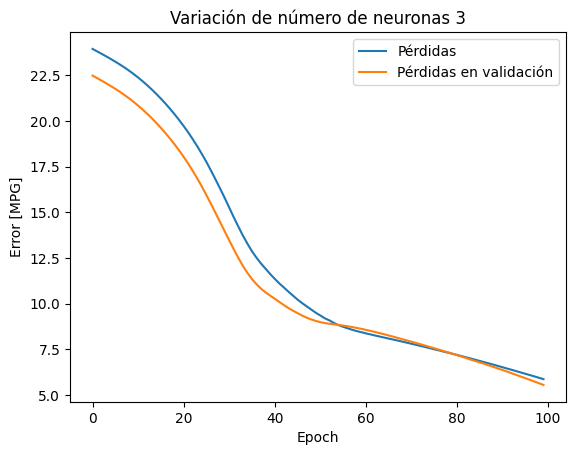

In [ ]:
plt.plot(history_NN3.history['loss'], label='Pérdidas')
plt.plot(history_NN3.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 3')
plt.legend()

In [ ]:
# x = tf.linspace(0.0, 250, 251).numpy()  
# x = np.tile(x[:, np.newaxis], (1, 4))   

# y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


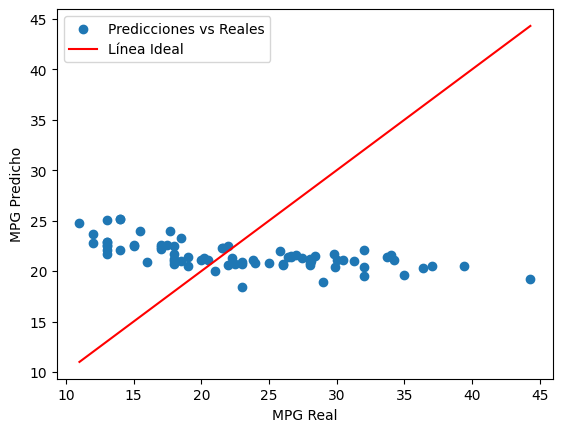

In [ ]:
# y_pred = Base_h_model.predict(test_X[Variables_exp])

# plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
# plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
# plt.xlabel("MPG Real")
# plt.ylabel("MPG Predicho")
# plt.legend()
# plt.show()

In [ ]:
test_res_NN1 = {}
test_res_NN1['NN_1_h_model'] = NN_1_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN1

{'NN_1_h_model': 5.5144524574279785}

In [ ]:
test_res_NN2 = {}
test_res_NN2['NN_2_h_model'] = NN_2_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN2

{'NN_2_h_model': 4.969393253326416}

In [ ]:
test_res_NN3 = {}
test_res_NN3['NN_3_h_model'] = NN_3_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN3

{'NN_3_h_model': 5.456470012664795}